In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [2]:
gender_data = pd.read_csv('Resources/sorted_occupation.csv')
gender_data

occupation  all_workers  \
0                                         CONSTRUCTION         5722   
1                                          MAINTENANCE         4301   
2               Driver sales workers and truck drivers         2687   
3                 Police and sheriff's patrol officers          655   
4                                       TRANSPORTATION         6953   
5                                  Engineers all other          393   
6                                          ENGINEERING         2656   
7    Laborers and freight stock and material movers...         1433   
8                                               Clergy          376   
9                                 Chefs and head cooks          340   
10                  Miscellaneous agricultural workers          613   
11   First-line supervisors of production and opera...          783   
12   Software developers applications and systems s...         1287   
13    Transportation storage and distribution managers          276   
14             Engineering technicians except drafters          352   
15                                  PROTECTIVE SERVICE         2729   
16         Metal workers and plastic workers all other          351   
17                                Computer programmers          450   
18                                        AGRICULTURAL          810   
19    Security guards and gaming surveillance officers          708   
20                      Computer occupations all other          490   
21                        Production workers all other          846   
22                                       COMPUTATIONAL         4009   
23   Butchers and other meat poultry and fish proce...          247   
24                     General and operations managers          823   
25          Bailiffs correctional officers and jailers          453   
26   Sales representatives wholesale and manufacturing         1138   
27                        Computer support specialists          396   
28                                          PRODUCTION         7551   
29           Computer and information systems managers          636   
30                                    Chief executives         1046   
31                      Janitors and building cleaners         1536   
32               Shipping receiving and traffic clerks          502   
33   Securities commodities and financial services ...          211   
34   First-line supervisors of non-retail sales wor...          835   
35            Sales representatives services all other          406   
36                           Computer systems analysts          499   
37                                      Web developers          151   
38                                      GROUNDSKEEPING         3605   
39                       Physical scientists all other          189   
40                      Stock clerks and order fillers         1027   
41    Inspectors testers sorters samplers and weighers          701   
42   First-line supervisors of housekeeping and jan...          172   
43                                             Lawyers          803   
44                   Food processing workers all other          132   
45                                               Cooks         1302   
46                        Postal service mail carriers          302   
47                             Physicians and surgeons          740   
48                                  Managers all other         2803   
49                         Personal financial advisors          407   
50                                 Retail salespersons         1918   
51            Miscellaneous assemblers and fabricators          950   
52                        Marketing and sales managers          948   
53                               Postal service clerks          127   
54                                          MANAGEMENT        12480   
55                                         Bus drivers          323 

In [3]:
gender_data['occupation']= gender_data['occupation'].str.lower()

In [4]:
#change category to string
gender_data['Category'] = gender_data['Category'].astype('string')


In [5]:
gender_data.dtypes

occupation                       object
all_workers                       int64
all_salary                        int64
male_workers                      int64
male_salary                       int64
female_workers                    int64
female_salary                     int64
female_to_male_salary_ratio     float64
female_to_male_workers_ratio    float64
male_worker_percent             float64
female_worker_percent           float64
representation_gap                int64
male_probability                  int64
Category                         string
dtype: object

In [6]:
gender_data['Category']

0        SL
1        SL
2        SL
3        PS
4        SL
5      STEM
6      STEM
7        SL
8        PS
9        FS
10       SL
11        M
12     STEM
13        M
14     STEM
15       PS
16       SL
17     STEM
18       SL
19       PS
20     STEM
21       SL
22     STEM
23       FS
24        M
25       PS
26        B
27     STEM
28       SL
29     STEM
30        M
31       SL
32       PS
33        B
34        M
35        B
36     STEM
37     STEM
38       SL
39     STEM
40       SL
41       SL
42        M
43        B
44       FS
45       FS
46       PS
47     STEM
48        M
49        B
50        B
51       SL
52        M
53       PS
54        M
55       SL
56        B
57        M
58       SL
59        M
60     STEM
61       PS
62        B
63       SL
64        B
65        M
66        M
67     STEM
68       SL
69       PS
70        B
71       FS
72        B
73        M
74       SL
75     STEM
76       SL
77        M
78        B
79     STEM
80       SL
81     STEM
82       FS
83  

In [7]:
gender_data= gender_data.sort_values('Category').reset_index()

In [8]:
gender_data

index                                         occupation  all_workers  \
0       70  purchasing agents except wholesale retail and ...          260   
1       43                                            lawyers          803   
2       49                        personal financial advisors          407   
3       50                                retail salespersons         1918   
4       56                                 financial analysts          295   
5       62                sales and related workers all other          158   
6       64                                              sales         9725   
7      139               receptionists and information clerks          852   
8       72   wholesale and retail buyers except farm products          142   
9       78                           advertising sales agents          161   
10      84                credit counselors and loan officers          313   
11      85                                              legal         1346   
12      88                             insurance sales agents          427   
13      89                                           business         5942   
14      92  claims adjusters appraisers examiners and inve...          317   
15      97               real estate brokers and sales agents          463   
16      98                           accountants and auditors         1464   
17     105          business operations specialists all other          186   
18     109                        bill and account collectors          152   
19     118                                             office        13894   
20     124                            human resources workers          592   
21     128      insurance claims and policy processing clerks          259   
22     133                              office clerks general          929   
23     138         bookkeeping accounting and auditing clerks          769   
24      35           sales representatives services all other          406   
25      33  securities commodities and financial services ...          211   
26     140          secretaries and administrative assistants         2223   
27      26  sales representatives wholesale and manufacturing         1138   
28      94                                         bartenders          252   
29      93                                   lodging managers          123   
30      45                                              cooks         1302   
31      44                  food processing workers all other          132   
32      23  butchers and other meat poultry and fish proce...          247   
33     110                             waiters and waitresses          868   
34      71                                           culinary         4124   
35     106  combined food preparation and serving workers ...          173   
36       9                               chefs and head cooks          340   
37      86                                             bakers          150   
38      87                 hotel motel and resort desk clerks          127   
39      82                           food preparation workers          366   
40      59                                purchasing managers          193   
41      96  property real estate and community association...          401   
42     112              social and community service managers          305   
43      65     first-line supervisors of retail sales workers         2326   
44      66           first-line supervisors of gaming workers          117   
45     102  first-line supervisors of food preparation and...          378   
46     107                           education administrators          778   
47      13   transportation storage and distribution managers          276   
48      57                   administrative services managers          170   
49      73                              food service managers          763   
50      77                 

In [9]:
gender_data= gender_data.sort_values('Category').reset_index()

In [10]:
#binning occupations
cut_labels_6 = ["B","FS","M", "PS", "SL", "STEM"]
cut_bins = [-1, 27, 39, 61, 79, 112, 140]

gender_data['Industry'] = pd.cut(gender_data['level_0'], bins=cut_bins, labels=cut_labels_6)



In [11]:
gender_data= gender_data.sort_values('Industry')

In [12]:
gender_data

level_0  index                                         occupation  \
0          0     70  purchasing agents except wholesale retail and ...   
27         7    139               receptionists and information clerks   
26        11     85                                              legal   
25        10     84                credit counselors and loan officers   
24         9     78                           advertising sales agents   
23         8     72   wholesale and retail buyers except farm products   
22         5     62                sales and related workers all other   
21         6     64                                              sales   
20        13     89                                           business   
19         4     56                                 financial analysts   
18         3     50                                retail salespersons   
17         2     49                        personal financial advisors   
15        12     88                             insurance sales agents   
14        16     98                           accountants and auditors   
16         1     43                                            lawyers   
12        15     97               real estate brokers and sales agents   
1         27     26  sales representatives wholesale and manufacturing   
2         26    140          secretaries and administrative assistants   
3         25     33  securities commodities and financial services ...   
4         24     35           sales representatives services all other   
13        14     92  claims adjusters appraisers examiners and inve...   
6         22    133                              office clerks general   
5         23    138         bookkeeping accounting and auditing clerks   
8         20    124                            human resources workers   
9         19    118                                             office   
10        18    109                        bill and account collectors   
11        17    105          business operations specialists all other   
7         21    128      insurance claims and policy processing clerks   
36        30     45                                              cooks   
39        33    110                             waiters and waitresses   
38        28     94                                         bartenders   
37        29     93                                   lodging managers   
34        32     23  butchers and other meat poultry and fish proce...   
35        31     44                  food processing workers all other   
32        34     71                                           culinary   
31        37     86                                             bakers   
30        38     87                 hotel motel and resort desk clerks   
29        39     82                           food preparation workers   
28        36      9                               chefs and head cooks   
33        35    106  combined food preparation and serving workers ...   
61        44     66           first-line supervisors of gaming workers   
60        48     57                   administrative services managers   
59        47     13   transportation storage and distribution managers   
58        46    107                           education administrators   
57        45    102  first-line supervisors of food preparation and...   
56        40     59                                purchasing managers   
55        43     65     first-line supervisors of retail sales workers   
54        42    112              social and community service managers   
53        41     96  property real estate and community association...   
51        49     73                              food service managers   
52        50     77                                 financial managers   
49        51     11  first-line supervisors of production and opera...   
50        52     54                                         management   
41       

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

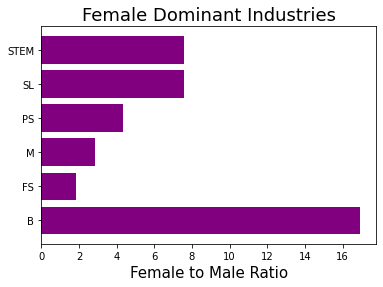

In [13]:
from matplotlib import *
plt.barh(gender_data.Industry, gender_data.female_to_male_workers_ratio,color='purple')

plt.xlabel("Female to Male Ratio", size=15)
plt.title("Female Dominant Industries", size=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

In [14]:
#KNN with male probability
from sklearn.neighbors import KNeighborsClassifier


In [15]:
gender_data = gender_data.drop(columns=["Category"])

In [16]:
#encoding 

dummy_gender = pd.get_dummies(gender_data['Industry'])
print(dummy_gender)

     B  FS  M  PS  SL  STEM
0    1   0  0   0   0     0
27   1   0  0   0   0     0
26   1   0  0   0   0     0
25   1   0  0   0   0     0
24   1   0  0   0   0     0
23   1   0  0   0   0     0
22   1   0  0   0   0     0
21   1   0  0   0   0     0
20   1   0  0   0   0     0
19   1   0  0   0   0     0
18   1   0  0   0   0     0
17   1   0  0   0   0     0
15   1   0  0   0   0     0
14   1   0  0   0   0     0
16   1   0  0   0   0     0
12   1   0  0   0   0     0
1    1   0  0   0   0     0
2    1   0  0   0   0     0
3    1   0  0   0   0     0
4    1   0  0   0   0     0
13   1   0  0   0   0     0
6    1   0  0   0   0     0
5    1   0  0   0   0     0
8    1   0  0   0   0     0
9    1   0  0   0   0     0
10   1   0  0   0   0     0
11   1   0  0   0   0     0
7    1   0  0   0   0     0
36   0   1  0   0   0     0
39   0   1  0   0   0     0
38   0   1  0   0   0     0
37   0   1  0   0   0     0
34   0   1  0   0   0     0
35   0   1  0   0   0     0
32   0   1  0   0   

In [17]:
gender_data = pd.merge(
    left=gender_data,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
print(gender_data)

     level_0  index                                         occupation  \
0          0     70  purchasing agents except wholesale retail and ...   
27         7    139               receptionists and information clerks   
26        11     85                                              legal   
25        10     84                credit counselors and loan officers   
24         9     78                           advertising sales agents   
23         8     72   wholesale and retail buyers except farm products   
22         5     62                sales and related workers all other   
21         6     64                                              sales   
20        13     89                                           business   
19         4     56                                 financial analysts   
18         3     50                                retail salespersons   
17         2     49                        personal financial advisors   
15        12     88                   

In [18]:
y = gender_data["male_probability"]
target_names = ["probably_female", "probably_male"]

In [19]:
gender_data = gender_data.drop(columns=["Industry"])

In [20]:
X = gender_data.drop(columns=["male_probability","level_0", "index", "male_worker_percent", "male_workers", "female_workers", "female_to_male_salary_ratio","female_to_male_workers_ratio","female_worker_percent" ])
X.head()

occupation  all_workers  \
0   purchasing agents except wholesale retail and ...          260   
27               receptionists and information clerks          852   
26                                              legal         1346   
25                credit counselors and loan officers          313   
24                           advertising sales agents          161   

    all_salary  male_salary  female_salary  representation_gap  B  FS  M  PS  \
0         1009         1020            986                  12  1   0  0   0   
27         575          619            569                -709  1   0  0   0   
26        1391         1877           1135                 -98  1   0  0   0   
25         997         1186            906                 -20  1   0  0   0   
24         925         1155            729                  -5  1   0  0   0   

    SL  STEM  
0    0     0  
27   0     0  
26   0     0  
25   0     0  
24   0     0

In [21]:
X = gender_data.drop(columns=["occupation"])
X.head()

level_0  index  all_workers  all_salary  male_workers  male_salary  \
0         0     70          260        1009           136         1020   
27        7    139          852         575            72          619   
26       11     85         1346        1391           624         1877   
25       10     84          313         997           146         1186   
24        9     78          161         925            78         1155   

    female_workers  female_salary  female_to_male_salary_ratio  \
0              124            986                     0.966667   
27             781            569                     0.919225   
26             722           1135                     0.604688   
25             166            906                     0.763912   
24              83            729                     0.631169   

    female_to_male_workers_ratio  male_worker_percent  female_worker_percent  \
0                       0.911765             0.523077               0.476923   
27                     10.847222             0.084507               0.916667   
26                      1.157051             0.463596               0.536404   
25                      1.136986             0.466454               0.530351   
24                      1.064103             0.484472               0.515528   

    representation_gap  male_probability  B  FS  M  PS  SL  STEM  
0                   12                 1  1   0  0   0   0     0  
27                -709                 0  1   0  0   0   0     0  
26                 -98                 0  1   0  0   0   0     0  
25                 -20                 0  1   0  0   0   0     0  
24                  -5                 0  1   0  0   0   0     0

## KNN Model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.972
k: 3, Train/Test Score: 1.000/0.944
k: 5, Train/Test Score: 0.962/0.861
k: 7, Train/Test Score: 0.933/0.889
k: 9, Train/Test Score: 0.924/0.889
k: 11, Train/Test Score: 0.914/0.944
k: 13, Train/Test Score: 0.905/0.972
k: 15, Train/Test Score: 0.943/0.972
k: 17, Train/Test Score: 0.952/0.972
k: 19, Train/Test Score: 0.952/1.000


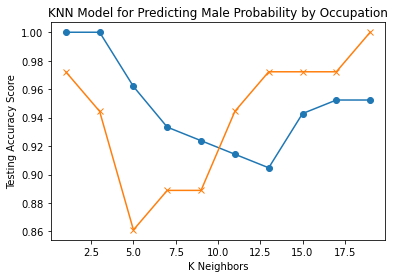

In [26]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.title("KNN Model for Predicting Male Probability by Occupation")

plt.savefig('KNNModel.png', dpi=100)
plt.show()

In [26]:
# Note that k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.889


## Random Forest Model

In [29]:
#RandomForest Classifier
from sklearn import tree
target = gender_data["male_probability"]
targetnames = ["probably female", "probably male"]

In [30]:
data =  gender_data.drop(columns=["male_probability","level_0", "index", "male_worker_percent", "male_workers", "female_workers", "female_to_male_salary_ratio","female_to_male_workers_ratio","female_worker_percent" ])
feature_names = data.columns
data.head()

occupation  all_workers  \
0   purchasing agents except wholesale retail and ...          260   
27               receptionists and information clerks          852   
26                                              legal         1346   
25                credit counselors and loan officers          313   
24                           advertising sales agents          161   

    all_salary  male_salary  female_salary  representation_gap  B  FS  M  PS  \
0         1009         1020            986                  12  1   0  0   0   
27         575          619            569                -709  1   0  0   0   
26        1391         1877           1135                 -98  1   0  0   0   
25         997         1186            906                 -20  1   0  0   0   
24         925         1155            729                  -5  1   0  0   0   

    SL  STEM  
0    0     0  
27   0     0  
26   0     0  
25   0     0  
24   0     0

In [31]:
data =  gender_data.drop(columns=["male_probability","level_0", "index", "male_worker_percent", "male_workers", "female_workers", "female_to_male_salary_ratio","female_to_male_workers_ratio","female_worker_percent", "occupation" ])
feature_names = data.columns
data.head()

all_workers  all_salary  male_salary  female_salary  representation_gap  \
0           260        1009         1020            986                  12   
27          852         575          619            569                -709   
26         1346        1391         1877           1135                 -98   
25          313         997         1186            906                 -20   
24          161         925         1155            729                  -5   

    B  FS  M  PS  SL  STEM  
0   1   0  0   0   0     0  
27  1   0  0   0   0     0  
26  1   0  0   0   0     0  
25  1   0  0   0   0     0  
24  1   0  0   0   0     0

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [35]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.727110379013347, 'representation_gap'),
 (0.06468352386523496, 'male_salary'),
 (0.06436894425940147, 'all_salary'),
 (0.05544710787569703, 'all_workers'),
 (0.04994580850657768, 'female_salary'),
 (0.014555542282913708, 'B'),
 (0.00692748083712296, 'SL'),
 (0.00526959569142764, 'M'),
 (0.005116839064260159, 'STEM'),
 (0.004316910605775582, 'PS'),
 (0.0022578679982418613, 'FS')]

In [36]:


model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train, y_train)

# Extract single tree
estimator = model.estimators_[190]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = targetnames,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [48]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [38]:
from sklearn import model_selection
import pickle

In [50]:
# save the model to disk
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0
